<a href="https://colab.research.google.com/github/Tamtu55/FashionRecommendation/blob/main/fashionRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Code


In [7]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle
import cv2
import matplotlib.pyplot as plt

#Importing ResNet50 Model and Cofiguration

In [8]:
model = ResNet50(weights='imagenet', include_top=False, pooling='max',input_shape=(224,224,3))
model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
filepath = []
path = '/content/drive/MyDrive/FashionRecommendation/images'

for file in os.listdir(path):
    filepath.append(os.path.join(path,file))

In [10]:
new_filepath = filepath[:10000]

In [11]:
feature_vector = []

for img in tqdm(new_filepath):
    img = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x,verbose=0).flatten()
    normalized_features = features / norm(features)
    feature_vector.append(normalized_features)

100%|██████████| 2718/2718 [12:54<00:00,  3.51it/s]


In [12]:
pickle.dump(feature_vector,open('feature_vector.pkl','wb'))
pickle.dump(filepath,open('filepath.pkl','wb'))

In [13]:
feature_vector_load = np.array(pickle.load(open('feature_vector.pkl','rb')))
filepath_load = pickle.load(open('filepath.pkl','rb'))

In [14]:
def feature_extract(img,model):
    img = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x,verbose=0).flatten()
    normalized_features = features / norm(features)
    return normalized_features

In [15]:
NN = NearestNeighbors(n_neighbors=7,algorithm='brute',metric='euclidean')
NN.fit(feature_vector_load)
img = '/content/drive/MyDrive/FashionRecommendation/images/10010.jpg'
processed_img = feature_extract(img,model)
distances,indices = NN.kneighbors([processed_img])

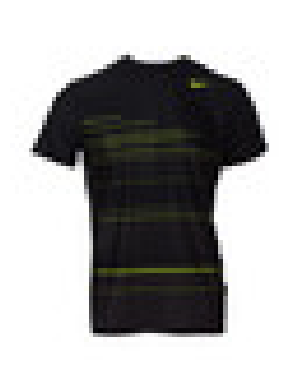

In [16]:
raw_img = cv2.imread(img)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
plt.imshow(raw_img)
plt.axis('off')
plt.show()

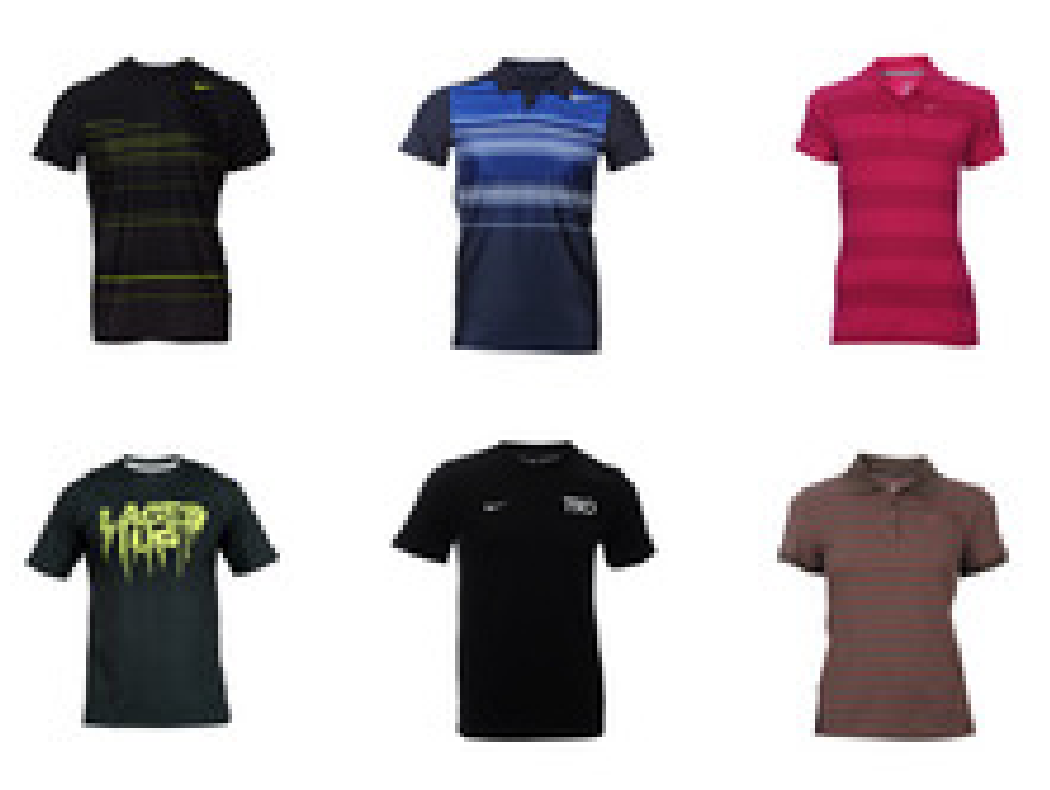

In [17]:
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

# Iterate over the indices and display images
for i, file in enumerate(indices[0][1:7]):
    temp_img = cv2.imread(filepath_load[file])
    image_rgb = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)

    # Display the image
    axes[i].imshow(image_rgb)
    axes[i].axis('off')

#Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [18]:
! pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [19]:
!wget -q -O - ipv4.icanhazip.com

34.16.157.44
